### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import joblib

### Load Data from CSV files

In [2]:
test_df = pd.read_csv("C:/Users/Aya Hassan/Kaggel/train.csv/train.csv")
test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

Is There are any Null values ? 

In [4]:
test_df.isnull().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

Is There are any Duplicates ? 

In [5]:
test_df.duplicated().sum()

0

Dropping ID Column and Spliting datafram into Features and Label

In [6]:
test_df = test_df.drop('ID',axis=1)
features = test_df.drop('y',axis=1)
label = test_df['y']


In [7]:
label.value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='Count'>

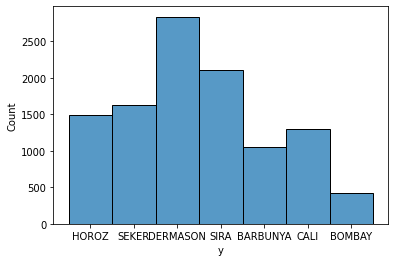

In [8]:
sns.histplot(label)

Correlation Between Features and label

<AxesSubplot:>

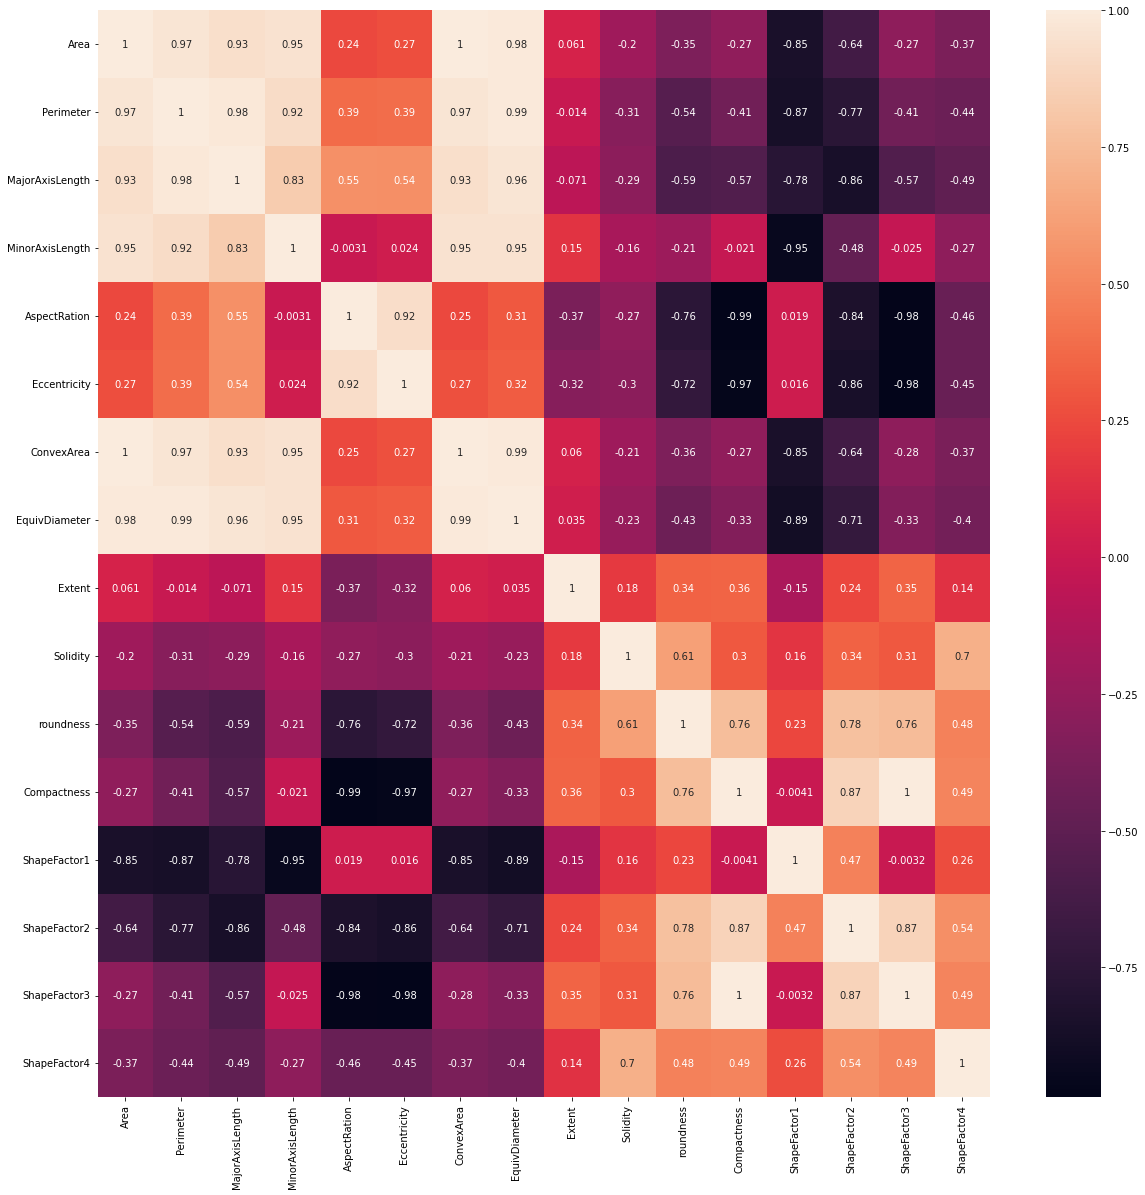

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(features.corr(), annot=True)
# plt.show()

In [10]:
# Choose from Drop one of each 
# ShapeFactor3 & Compactness
# ConvexArea & Area


Get more information about each Feature Destribution

In [11]:
test_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


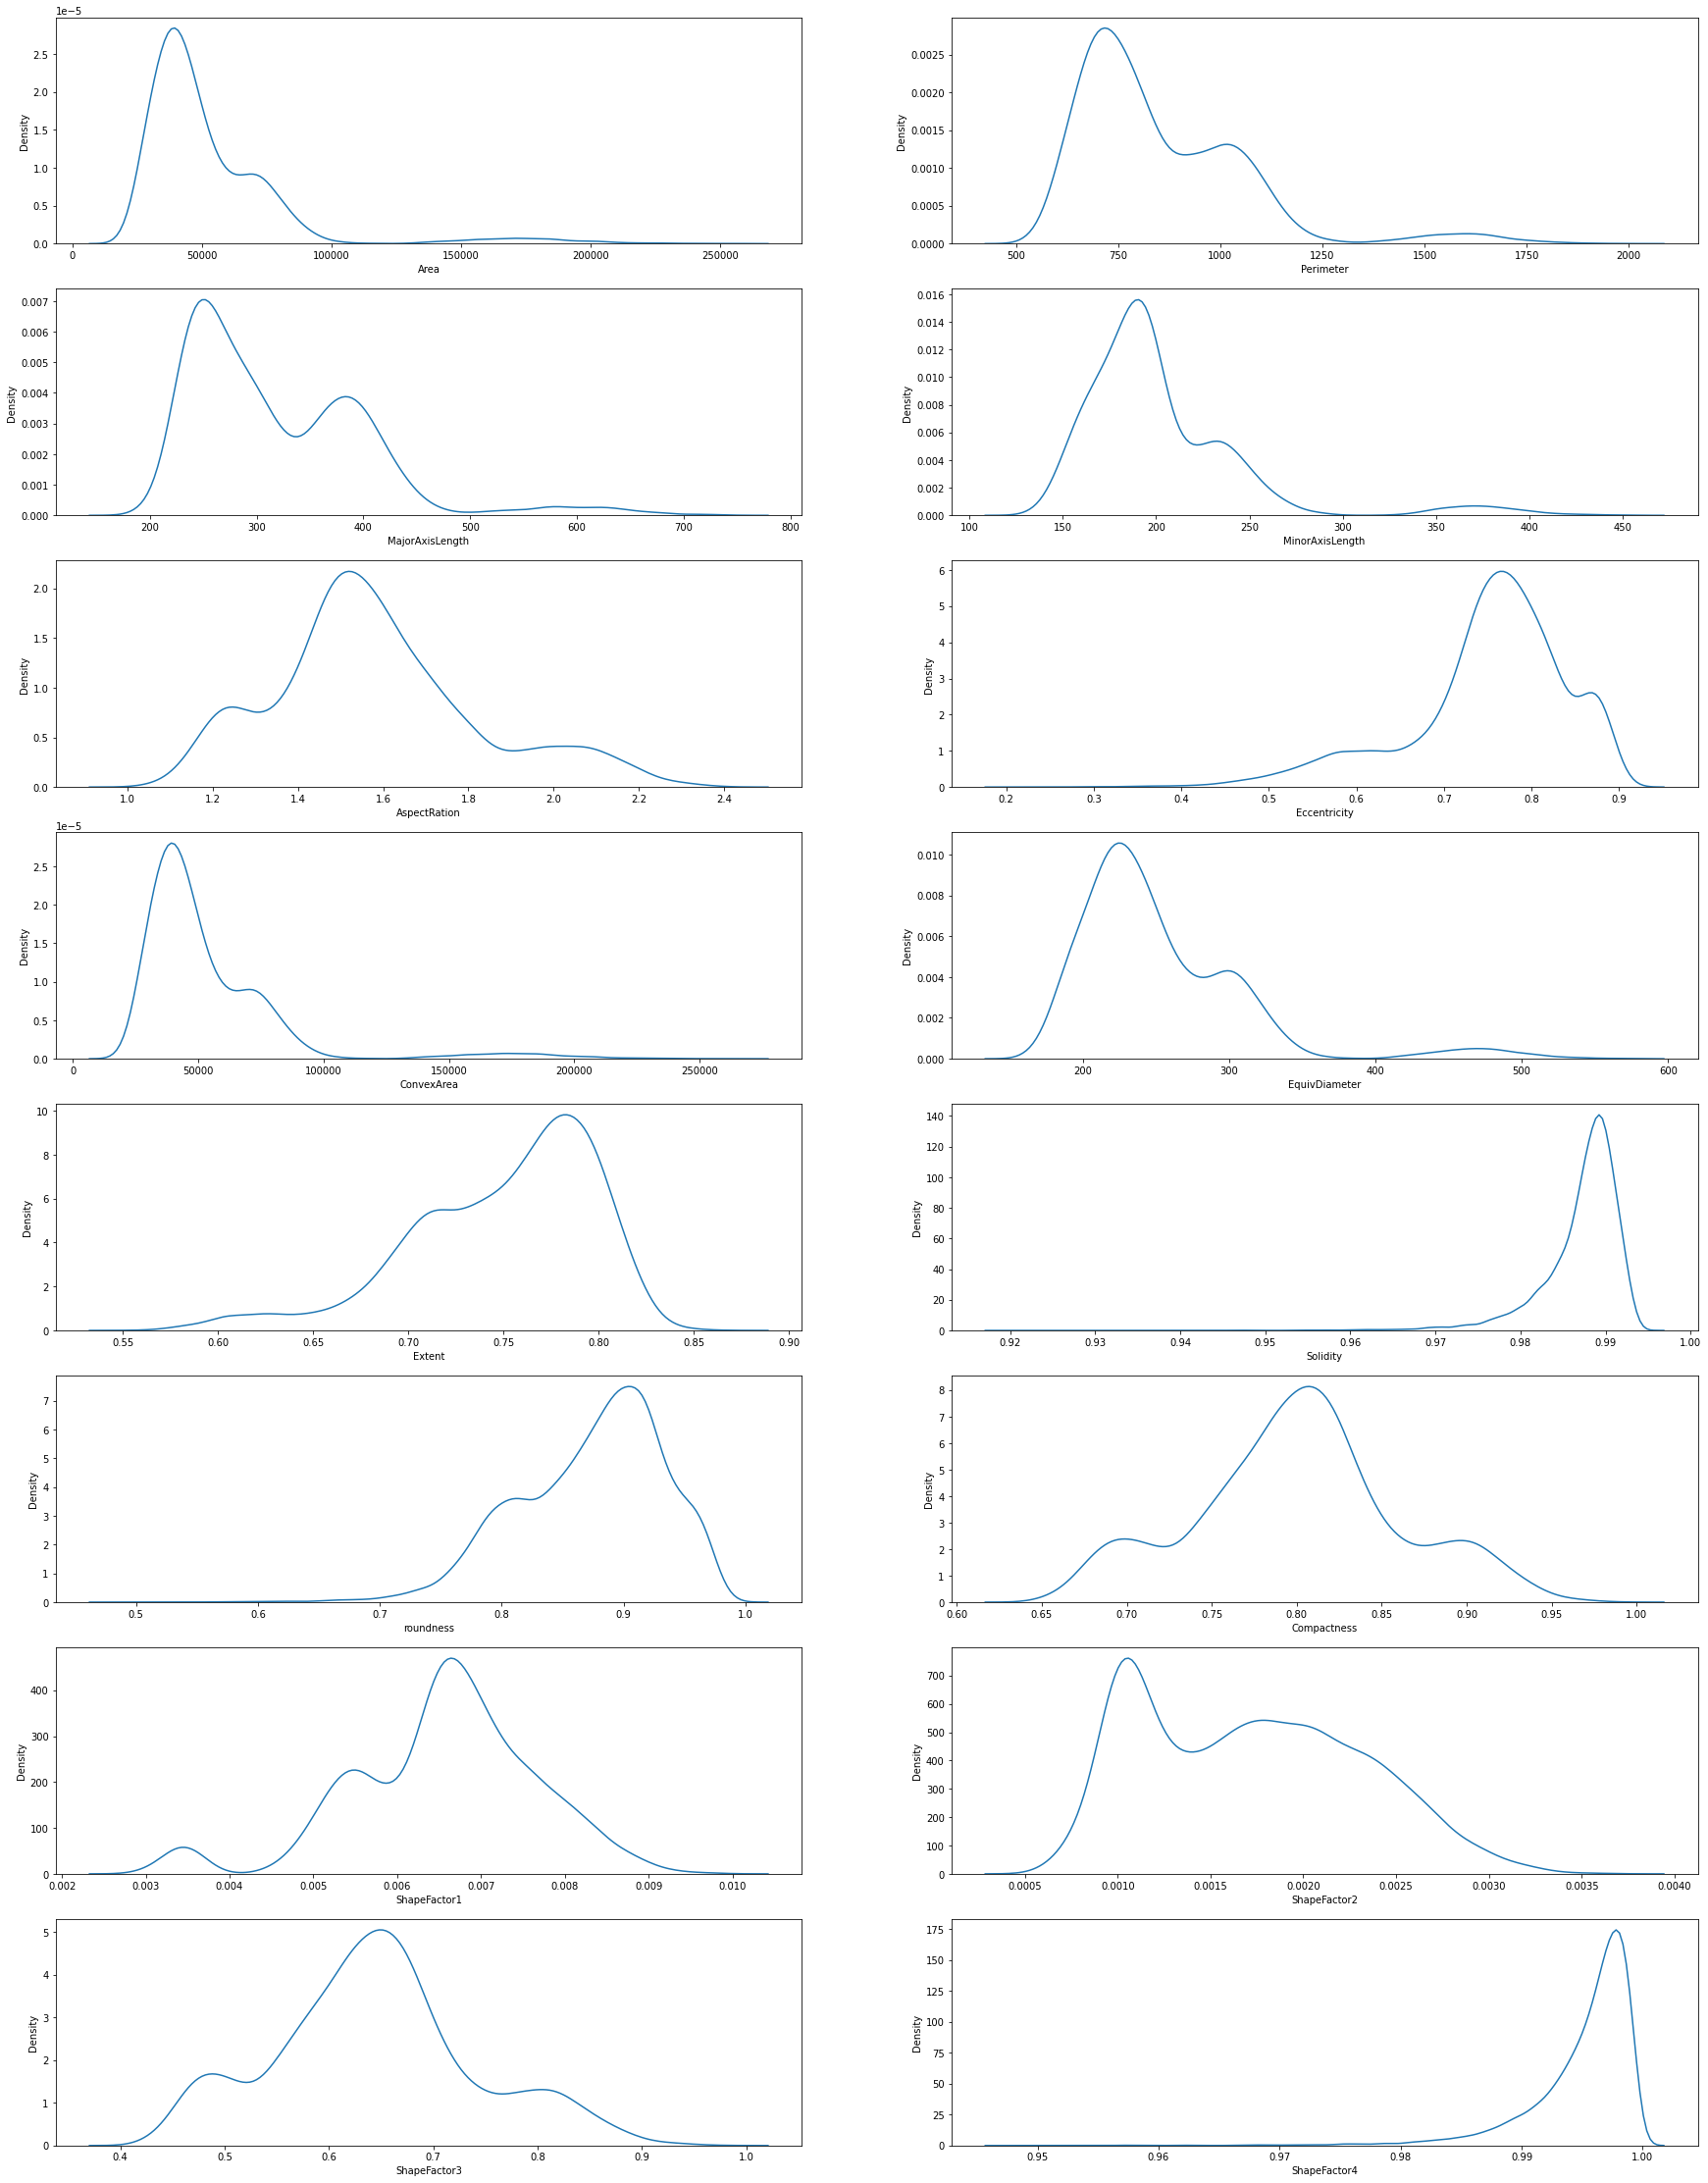

In [12]:
plt.figure(figsize=(30,45))
for i, col in enumerate(test_df.columns):
    if test_df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(test_df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [13]:
# Area               
# Perimeter          
# MajorAxisLength    
# MinorAxisLength    
# AspectRation       
# Eccentricity       
# ConvexArea         
# EquivDiameter

# test_df = test_df.drop(['Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter'],axis=1)

In [14]:
test_df = test_df.drop(['ConvexArea','Compactness'],axis=1)
features = test_df.drop('y',axis=1)
label = test_df['y']


### Scalling Data

MinMax Scaling

In [15]:
min_max_scaler = MinMaxScaler()
scaled_features = min_max_scaler.fit_transform(features.values)
scaled_features

array([[0.16148013, 0.30564187, 0.38468803, ..., 0.11776341, 0.0958224 ,
        0.97814356],
       [0.10288391, 0.15931453, 0.14765957, ..., 0.58434993, 0.69323551,
        0.95460578],
       [0.04800253, 0.08822764, 0.1013964 , ..., 0.5575947 , 0.50863386,
        0.9616665 ],
       ...,
       [0.26224615, 0.39098202, 0.45066721, ..., 0.14127264, 0.24560083,
        0.89776877],
       [0.11866983, 0.20639699, 0.22699011, ..., 0.34179269, 0.40080251,
        0.9050854 ],
       [0.03247707, 0.05889398, 0.05735234, ..., 0.72184852, 0.63099271,
        0.99201841]])

Standerized Scaling

In [16]:
standard_scaler = StandardScaler()
standard_features = standard_scaler.fit_transform(features.values)
standard_features

array([[ 0.17407311,  0.53971281,  0.89772665, ..., -1.32844459,
        -1.7722305 ,  0.81575981],
       [-0.29046488, -0.4543369 , -0.63340135, ...,  1.10985565,
         1.62187655,  0.53123715],
       [-0.72555246, -0.93725355, -0.93224663, ...,  0.97003749,
         0.57309175,  0.61658647],
       ...,
       [ 0.97292409,  1.11945653,  1.32393103, ..., -1.20558943,
        -0.9212883 , -0.15580378],
       [-0.16531754, -0.13449033, -0.12095148, ..., -0.15770644,
        -0.03953478, -0.06736094],
       [-0.84863489, -1.13652679, -1.21675714, ...,  1.82839945,
         1.26825404,  0.98347781]])

Normalize Data

In [17]:
normalized_features = normalize(features)
normalized_features

array([[9.99821624e-01, 1.66751905e-02, 6.81911814e-03, ...,
        1.59546066e-08, 8.06878904e-06, 1.71437358e-05],
       [9.99811577e-01, 1.70157981e-02, 5.96518985e-03, ...,
        5.33679720e-08, 1.80469288e-05, 2.24010346e-05],
       [9.99723964e-01, 2.06431221e-02, 7.57489123e-03, ...,
        7.24062698e-08, 2.21167310e-05, 3.15034441e-05],
       ...,
       [9.99884165e-01, 1.33901542e-02, 5.30063335e-03, ...,
        1.22452136e-08, 6.76401028e-06, 1.21497208e-05],
       [9.99810788e-01, 1.71369294e-02, 6.42124107e-03, ...,
        3.36782026e-08, 1.32774700e-05, 2.06298113e-05],
       [9.99692786e-01, 2.17924538e-02, 7.68502037e-03, ...,
        9.99649635e-08, 2.74218981e-05, 3.56458333e-05]])

### Applying PCA

In [18]:
scaled_pca = PCA()
scaled_pca_df =scaled_pca.fit_transform(scaled_features) 
scaled_pca.explained_variance_ratio_

array([5.92149278e-01, 2.77669295e-01, 6.77887169e-02, 2.65074287e-02,
       1.58428011e-02, 1.03955948e-02, 7.05186048e-03, 1.67639865e-03,
       7.37234979e-04, 8.84295974e-05, 5.98027336e-05, 2.17151854e-05,
       1.12220796e-05, 2.22366766e-07])

Text(0, 0.5, 'cumulative explained variance')

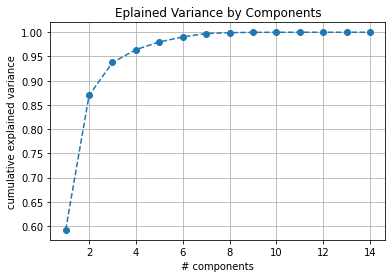

In [19]:
plt.plot(range(1,len(features.columns)+1),scaled_pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.grid()
plt.title('Eplained Variance by Components')
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

In [20]:
standard_pca = PCA()
standard_pca_df =standard_pca.fit_transform(scaled_features) 
standard_pca.explained_variance_ratio_

array([5.92149278e-01, 2.77669295e-01, 6.77887169e-02, 2.65074287e-02,
       1.58428011e-02, 1.03955948e-02, 7.05186048e-03, 1.67639865e-03,
       7.37234979e-04, 8.84295974e-05, 5.98027336e-05, 2.17151854e-05,
       1.12220796e-05, 2.22366766e-07])

Text(0, 0.5, 'cumulative explained variance')

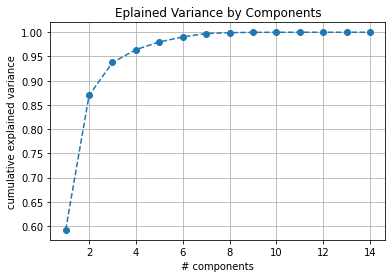

In [21]:
plt.plot(range(1,len(features.columns)+1),standard_pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.grid()
plt.title('Eplained Variance by Components')
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

In [22]:
nornalized_pca = PCA()
normalized_pca_df = nornalized_pca.fit_transform(normalized_features) 
nornalized_pca.explained_variance_ratio_

array([9.74078768e-01, 2.33046282e-02, 2.58307310e-03, 2.62226300e-05,
       7.18436058e-06, 7.69276257e-08, 2.08872540e-08, 1.49249197e-08,
       9.64067693e-09, 6.30701050e-10, 1.82361007e-10, 4.47529918e-11,
       2.23822625e-13, 6.34879885e-15])

Text(0, 0.5, 'cumulative explained variance')

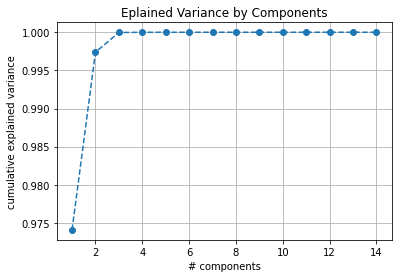

In [23]:
plt.plot(range(1,len(features.columns)+1),nornalized_pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.grid()
plt.title('Eplained Variance by Components')
plt.xlabel('# components')
plt.ylabel('cumulative explained variance')

In [24]:
scaled_pca = PCA(3)
scaled_pca_df = scaled_pca.fit(features)
_trans = scaled_pca.transform(features)

scaled_trans_df = pd.DataFrame(data= _trans)
scaled_trans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10834 non-null  float64
 1   1       10834 non-null  float64
 2   2       10834 non-null  float64
dtypes: float64(3)
memory usage: 254.0 KB


In [25]:
standard_pca = PCA(3)
standard_pca_df = standard_pca.fit(features)
_trans = standard_pca.transform(features)

standard_trans_df = pd.DataFrame(data= _trans)
standard_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10834 non-null  float64
 1   1       10834 non-null  float64
 2   2       10834 non-null  float64
dtypes: float64(3)
memory usage: 254.0 KB


In [26]:
nornalized_pca = PCA(3)
nornalized_pca_df = nornalized_pca.fit(features)
_trans = nornalized_pca.transform(features)

normalized_trans_df = pd.DataFrame(data= _trans)
normalized_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10834 non-null  float64
 1   1       10834 non-null  float64
 2   2       10834 non-null  float64
dtypes: float64(3)
memory usage: 254.0 KB


### Building Gaussian Naive Bayes Model

##### Baseline Model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
print("Accuracy = %f"%(accuracy_score(y_test, y_pred)))


Number of mislabeled points out of a total 3251 points : 726
Accuracy = 0.776684


Precision , Recall , F-score

In [28]:
print("Precision , Recall , F-score : ")
precision_recall_fscore_support(y_test, y_pred, average='macro')

Precision , Recall , F-score : 


(0.7869200831778428, 0.7805026994566473, 0.779360935329553, None)

In [29]:
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(normalized_trans_df, label, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred_normalized = gnb.fit(X_train_normalized, y_train_normalized).predict(X_test_normalized)

print("Number of mislabeled points out of a total %d points : %d"% (X_test_normalized.shape[0], (y_test_normalized != y_pred_normalized).sum()))
print("Accuracy = %f"%(accuracy_score(y_test_normalized, y_pred)))

Number of mislabeled points out of a total 3251 points : 339
Accuracy = 0.776684


In [30]:
print("Precision , Recall , F-score : ")
precision_recall_fscore_support(y_test_normalized, y_pred, average='macro')

Precision , Recall , F-score : 


(0.7869200831778428, 0.7805026994566473, 0.779360935329553, None)

In [31]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_trans_df, label, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred_scaled = gnb.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)

print("Number of mislabeled points out of a total %d points : %d"% (X_test_scaled.shape[0], (y_test_scaled != y_pred_scaled).sum()))
print("Accuracy = %f"%(accuracy_score(y_test_normalized, y_pred)))

Number of mislabeled points out of a total 3251 points : 339
Accuracy = 0.776684


In [32]:
print("Precision , Recall , F-score : ")
precision_recall_fscore_support(y_test_scaled, y_pred_scaled, average='macro')

Precision , Recall , F-score : 


(0.9078613657192689, 0.9093059640531782, 0.9079073919859473, None)

In [33]:
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(features, label, test_size=0.3, random_state=0)
gnb = GaussianNB()
y_pred_standard = gnb.fit(X_train_standard, y_train_standard).predict(X_test_standard)

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test_standard != y_pred_standard).sum()))
print("Accuracy = %f"%(accuracy_score(y_test_standard, y_pred_standard)))


Number of mislabeled points out of a total 3251 points : 726
Accuracy = 0.776684


In [34]:
print("Precision , Recall , F-score : ")
precision_recall_fscore_support(y_test_standard, y_pred_standard, average='macro')

Precision , Recall , F-score : 


(0.7869200831778428, 0.7805026994566473, 0.779360935329553, None)

In [35]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[154,   0, 130,   0,  26,   0,  16],
       [  0, 123,   0,   0,   0,   0,   0],
       [ 50,   0, 318,   0,  15,   0,   4],
       [  0,   0,   0, 735,   0, 102,  43],
       [  7,   0,  17,  14, 360,   0,  40],
       [  8,   0,   0,  67,   5, 348,  64],
       [  0,   0,   0,  34,  39,  45, 487]], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[154,   0, 130,   0,  26,   0,  16],
       [  0, 123,   0,   0,   0,   0,   0],
       [ 50,   0, 318,   0,  15,   0,   4],
       [  0,   0,   0, 735,   0, 102,  43],
       [  7,   0,  17,  14, 360,   0,  40],
       [  8,   0,   0,  67,   5, 348,  64],
       [  0,   0,   0,  34,  39,  45, 487]], dtype=int64)

### Elastic Net

In [37]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression



In [38]:
import plotly.express as px
from dash import Dash,dcc,html
from dash_bootstrap_templates import load_figure_template
import dash_bootstrap_components as dbc
from dash.dependencies import Input,Output
import grasia_dash_components as gdc
import time

In [39]:
# DERMASON    2837
# SIRA        2109
# SEKER       1621
# HOROZ       1488
# CALI        1304
# BARBUNYA    1057
# BOMBAY 

# category_orders={'y': ["DERMASON", "SIRA", "SEKER","HOROZ","CALI", "BARBUNYA","BOMBAY"]}

In [40]:

fig=px.area(test_df,x='y',y=['Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter'], color = 'y' , height=500)
fig.update_traces(dict(marker_line_width=0))
fig.show()  


NameError: A name conflict was encountered for argument 'y'. A column or index with name 'y' is ambiguous.

In [ ]:
fig2 = px.bar(test_df,x='y',y ='Perimeter',color='y',barmode ='stack')
fig2.update_xaxes(categoryorder='total ascending')
fig2.update_traces(dict(marker_line_width=0))
fig2.show()

In [ ]:
# Bootstarp theme templalets
templates = [
    "bootstrap",
    "minty",
    "pulse",
    "flatly",
    "quartz",
    "cyborg",
    "darkly",
    "vapor",
]
# Loading these templates
load_figure_template(templates)

# Creating Dash with theme = Darkly 
app = Dash(__name__, external_stylesheets=[dbc.themes.FLATLY])

In [ ]:
graphs = html.Div([
    dbc.CardBody([
        html.P("Choose The Feature")
        ,dcc.Graph(id = "scatter_plot")
        ,dcc.Dropdown(options=[{'label':str(col),'value':str(col)}for col in features.columns],id='dropdown_col_x' )
        # ,dcc.Dropdown(options=[{'label':str(col),'value':str(col)}for col in label.columns],id='dropdown_col_y')
    ])
])

In [ ]:
@app.callback(
    Output(component_id="scatter_plot",component_property="figure"),
    Input(component_id="dropdown_col_x",component_property="value")
    # Input(component_id="dropdown_col_y",component_property="value"),
)

def update_scatter_graph(value_x):
    x = test_df[value_x]
    # y = test_df[value_y]
    fig = px.bar(test_df,test_df['y'],x,color='y',barmode ='stack')
    fig.update_xaxes(categoryorder='total ascending')
    fig.update_traces(dict(marker_line_width=0))
    return fig

In [ ]:
heading = html.H1("Dry Beans Classification",className="bg-primary text-white p-2" , style={'text-align': 'center'})

app.layout = dbc.Container([heading, graphs], fluid=True)

In [ ]:
app.run_server()